In [21]:
import os
import csv
import pandas as pd
from pathlib import Path
import scipy.stats as stats
from scipy.stats import ttest_ind

In [6]:
West_df = pd.read_csv("West_data.csv")

# Display sample data
West_df.head(14)

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alaska,West,Male,Fair,16,0,Within past year (anytime less than 12 months ...,No,9,None of them,...,1.88,124.74,35.31,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",Yes,Yes
1,Alaska,West,Female,Good,0,0,Within past year (anytime less than 12 months ...,Yes,7,"6 or more, but not all",...,1.63,65.77,24.89,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alaska,West,Male,Excellent,0,0,Within past year (anytime less than 12 months ...,Yes,8,None of them,...,1.80,74.84,23.01,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alaska,West,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,7,"6 or more, but not all",...,1.70,68.04,23.49,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
4,Alaska,West,Female,Very good,2,0,Within past year (anytime less than 12 months ...,Yes,7,None of them,...,1.65,67.13,24.63,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
5,Alaska,West,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,...,1.78,81.65,25.83,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alaska,West,Male,Poor,30,0,Within past year (anytime less than 12 months ...,No,7,"6 or more, but not all",...,1.85,89.81,26.12,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alaska,West,Female,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,7,1 to 5,...,1.57,54.43,21.95,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alaska,West,Female,Good,2,0,Within past year (anytime less than 12 months ...,No,6,None of them,...,1.65,62.60,22.96,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alaska,West,Female,Good,7,2,Within past year (anytime less than 12 months ...,Yes,4,"6 or more, but not all",...,1.52,63.05,27.15,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [19]:
West_df.PhysicalActivities.replace(('Yes','No'), (1,0), inplace=True)
West_df.HadHeartAttack.replace(('Yes','No'), (1,0), inplace=True)
West_df.HadStroke.replace(('Yes','No'), (1,0), inplace=True)
West_df.AlcoholDrinkers.replace(('Yes','No'), (1,0), inplace=True)
West_df.SmokerStatus.replace(('No','Former smoker','Current smoker - now smokes some days','Current smoker - now smokes every day'), (0,1,2,3), inplace=True)
West_df.ECigaretteUsage.replace(('Never used e-cigarettes in my entire life','Not at all (right now)','Use them some days','Use them every day'), (0,1,2,3), inplace=True)
West_df.RemovedTeeth.replace(('None of them','1 to 5','6 or more, but not all','All'), (0,1,2,3), inplace=True)
West_df.GeneralHealth.replace(('Excellent','Very good','Good','Fair', 'Poor'), (0,1,2,3,4), inplace=True)
West_df.head(15)

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alaska,West,Male,3,16,0,Within past year (anytime less than 12 months ...,0,9,0,...,1.88,124.74,35.31,1,No,No,Yes,"No, did not receive any tetanus shot in the pa...",Yes,Yes
1,Alaska,West,Female,2,0,0,Within past year (anytime less than 12 months ...,1,7,2,...,1.63,65.77,24.89,0,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alaska,West,Male,0,0,0,Within past year (anytime less than 12 months ...,1,8,0,...,1.80,74.84,23.01,1,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alaska,West,Male,2,0,0,Within past year (anytime less than 12 months ...,1,7,2,...,1.70,68.04,23.49,1,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
4,Alaska,West,Female,1,2,0,Within past year (anytime less than 12 months ...,1,7,0,...,1.65,67.13,24.63,1,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,Yes
5,Alaska,West,Male,2,0,0,Within past year (anytime less than 12 months ...,1,6,0,...,1.78,81.65,25.83,0,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alaska,West,Male,4,30,0,Within past year (anytime less than 12 months ...,0,7,2,...,1.85,89.81,26.12,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
7,Alaska,West,Female,1,0,0,Within past year (anytime less than 12 months ...,1,7,1,...,1.57,54.43,21.95,1,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alaska,West,Female,2,2,0,Within past year (anytime less than 12 months ...,0,6,0,...,1.65,62.60,22.96,0,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alaska,West,Female,2,7,2,Within past year (anytime less than 12 months ...,1,4,2,...,1.52,63.05,27.15,0,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [20]:
stats.chisquare(West_df['HadHeartAttack'], West_df['SmokerStatus']) #df Yes-no plus four categories

TypeError: can only concatenate str (not "int") to str

In [27]:
cat1 = West_df['WeightInKilograms']
cat2 = West_df['BMI']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=623.7449580175759, pvalue=0.0)

In [29]:
cat1 = West_df['HadHeartAttack']
cat2 = West_df['RemovedTeeth']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=-162.67597653367878, pvalue=0.0)

In [34]:
cat1 = West_df['HadHeartAttack']
cat2 = West_df['SmokerStatus']

ttest_ind(cat1, cat2)

TypeError: can only concatenate str (not "int") to str

In [35]:
cat1 = West_df['HadHeartAttack']
cat2 = West_df['GeneralHealth']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=-339.280001293554, pvalue=0.0)

In [26]:
cat1 = West_df['HadHeartAttack']
cat2 = West_df['BMI']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=-1120.2853034722498, pvalue=0.0)

In [14]:
hrtattack_wr=West_df.groupby('HadHeartAttack')['HadHeartAttack'].count()
hrtattack_wr

#HadHeartAttack
#No     59726
#Yes     3093
#4.924% had heart attacks

stroke_wr=West_df.groupby('HadStroke')['HadStroke'].count()
stroke_wr

#HadStroke
#No     60481
#Yes     2338
#3.722% had a stroke 

HadStroke
No     60481
Yes     2338
Name: HadStroke, dtype: int64

In [31]:
West_women = West_df[West_df['Sex']=='Female']
West_women.head()
West_men = West_df[West_df['Sex']=='Male']
West_men.head()

,State,Region,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alaska,West,Male,3,16,0,Within past year (anytime less than 12 months ...,0,9,0,...,1.88,124.74,35.31,1,No,No,Yes,"No, did not receive any tetanus shot in the pa...",Yes,Yes
2,Alaska,West,Male,0,0,0,Within past year (anytime less than 12 months ...,1,8,0,...,1.80,74.84,23.01,1,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,Alaska,West,Male,2,0,0,Within past year (anytime less than 12 months ...,1,7,2,...,1.70,68.04,23.49,1,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
5,Alaska,West,Male,2,0,0,Within past year (anytime less than 12 months ...,1,6,0,...,1.78,81.65,25.83,0,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alaska,West,Male,4,30,0,Within past year (anytime less than 12 months ...,0,7,2,...,1.85,89.81,26.12,0,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [32]:
cat1 = West_women['HadHeartAttack']
cat2 = West_men['HadHeartAttack']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=-17.96800507077637, pvalue=5.259477264381248e-72)

In [33]:
cat1 = West_women['HadStroke']
cat2 = West_men['HadStroke']

ttest_ind(cat1, cat2)

Ttest_indResult(statistic=-0.10106935224034075, pvalue=0.9194957293712218)

In [8]:
West_numbers.to_csv("West_numbers.csv", index_label="Patient")

In [31]:
removedteeth_wr=West_df.groupby('RemovedTeeth')['RemovedTeeth'].count()
removedteeth_wr

RemovedTeeth
0    36059
1    18173
2     5667
3     2920
Name: RemovedTeeth, dtype: int64

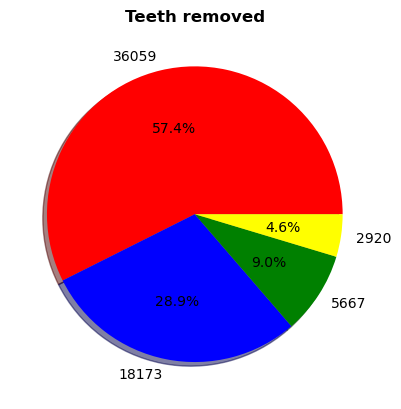

In [33]:
labels=removedteeth_wr
colors=['red','blue','green', 'yellow']
plt.pie(removedteeth_wr, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Teeth removed", fontweight='bold')
plt.show()